In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json

with open('med_categories.json','r') as f:
    med_categories = json.load(f)
med_categories

{'Antiarrhythmics': ['Amiodarone 600/500',
  'Amiodarone',
  'Lidocaine',
  'Adenosine',
  'Procainamide'],
 'Electrolyte Supplements': ['Potassium Chloride',
  'Calcium Gluconate',
  'Calcium Gluconate (CRRT)',
  'K Phos',
  'Na Phos'],
 'Beta-Blockers': ['Metoprolol', 'Labetalol', 'Esmolol'],
 'Diuretics': ['Furosemide (Lasix)', 'Furosemide (Lasix) 250/50', 'Mannitol'],
 'Cardiac Glycosides': ['Digoxin (Lanoxin)'],
 'Insulins': ['Insulin - Regular',
  'Insulin - Humalog',
  'Insulin - Glargine',
  'Insulin - NPH',
  'Insulin - 70/30',
  'Insulin - Novolog',
  'Insulin - Humalog 75/25'],
 'Opioid Analgesics': ['Fentanyl',
  'Fentanyl (Concentrate)',
  'Hydromorphone (Dilaudid)',
  'Morphine Sulfate',
  'Meperidine (Demerol)',
  'Methadone Hydrochloride'],
 'Sedatives and Anesthetics': ['Propofol',
  'Midazolam (Versed)',
  'Dexmedetomidine (Precedex)',
  'Lorazepam (Ativan)',
  'Ketamine',
  'Diazepam (Valium)',
  'Pentobarbital'],
 'Thrombolytics': ['Alteplase (TPA)'],
 'Vasopressors

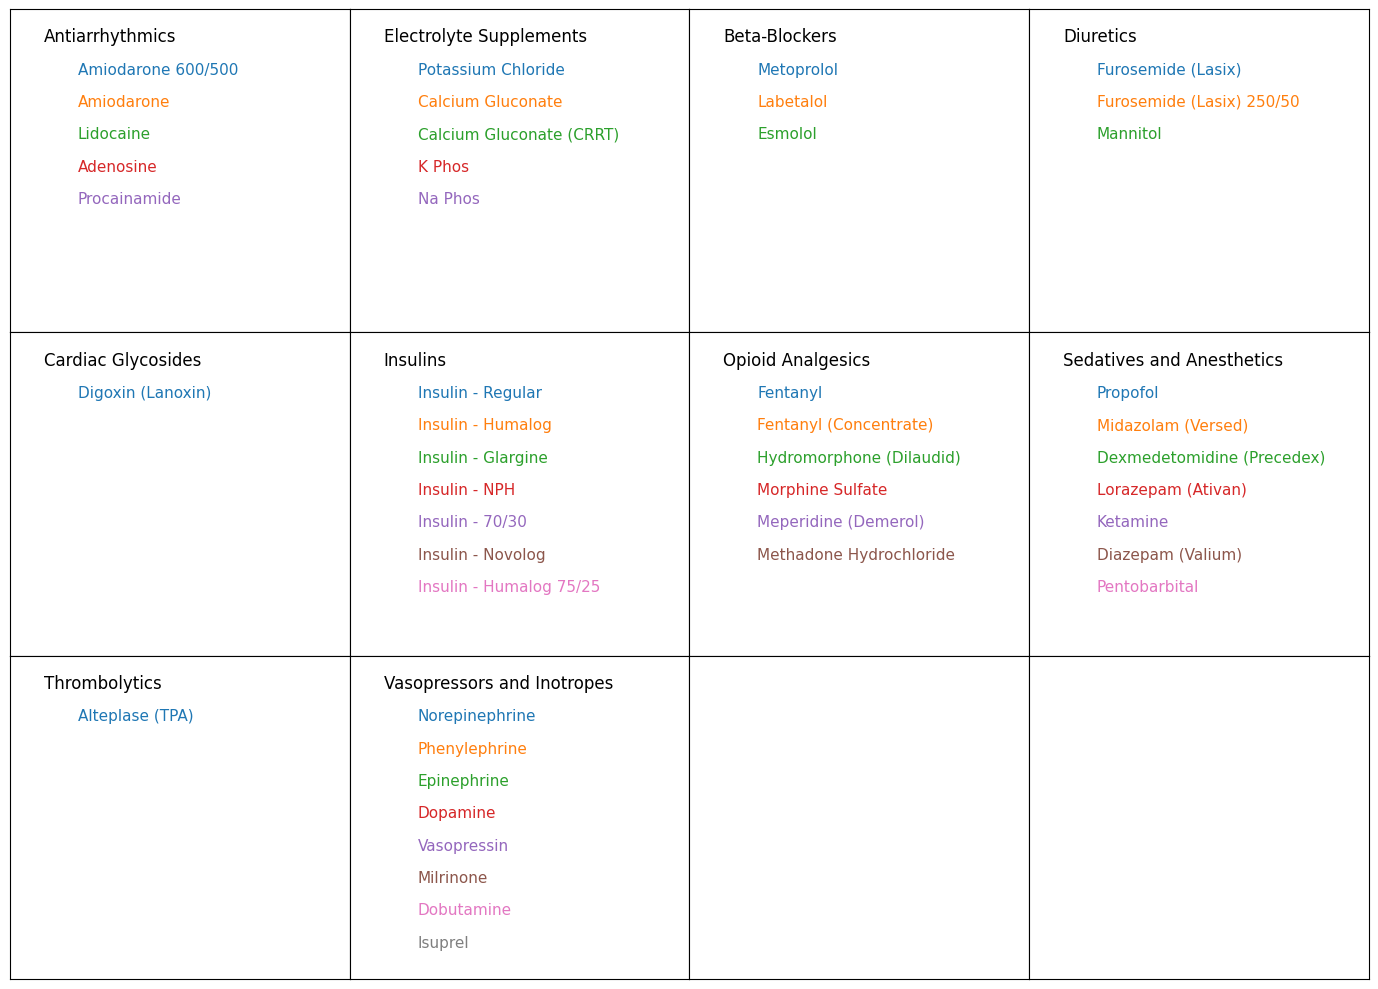

In [3]:
fig,axs = plt.subplots(3, 4, figsize=(14,10), gridspec_kw={'wspace': 0, 'hspace': 0})
cp = sns.color_palette()

for (parent_category, subcategories), ax in zip(med_categories.items(), axs.flatten()):
    ax.set_ylim([0,50])
    ax.set_xlim([0,50])
    ax.text(5,45,parent_category,fontsize=12,fontweight=500)
    for i, cat in enumerate(subcategories):
        ax.text(10,40-(5*i),cat,fontsize=11,color=cp[i])

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
# fig.savefig('images/med_names.pdf',bbox_inches='tight')

In [21]:
def convert_datetime(date_str, time_str):
    try:
        date = pd.to_datetime(date_str, format='%Y%m%d')
        hours = int(time_str // 10000)
        minutes = int((time_str % 10000) // 100)
        seconds = int(time_str % 100)
        time = pd.to_timedelta(f'{hours}:{minutes}:{seconds}')
        return date + time
    except Exception as e:
        print(f"Fehler beim Parsing: {e}")
        return pd.NaT

In [12]:
# train_meta_info = pd.read_csv('data/train_meta_info.csv')
# train_meta_info['split'] = 'train'
# val_meta_info = pd.read_csv('data/val_meta_info.csv')
# val_meta_info['split'] = 'val'
# test_meta_info = pd.read_csv('data/test_meta_info.csv')
# test_meta_info['split'] = 'test'
# all_subjects = pd.concat([train_meta_info, val_meta_info, test_meta_info], ignore_index=True)
# all_subjects = all_subjects[[c for c in all_subjects.columns if not c.startswith('Unnamed')]]
# all_subjects.to_csv('data/meta.csv')
all_subjects = pd.read_csv('data/meta.csv', index_col=0)
all_subjects

,subject_id,hadm_id,stay_id,id_ehr,id_cxr,last_careunit,intime,outtime,los,admittime,...,last_echo_id,last_ecg_id,split,study_id_cxr,demographics_text2,demographics_text,cxr_text,ecg_text,med_text,icd_text
0,18730522,21463350,30004391,18730522_episode2_timeseries.csv,d2bae3a3-3917d71b-f44edcd7-81c7017a-f15288e7,Medical Intensive Care Unit (MICU),2153-09-05 13:12:00,2153-09-13 18:21:18,8.214792,2153-09-05 11:58:00,...,NaN,NaN,train,51967233,A Patient was admitted to the ICU in the Medic...,"A male, white, 89 years old patient with a wei...",CXR findings: None. CXR impressions: Left PICC...,NaN,The patient received Dexmedetomidine (Precedex...,The patient's diagnoses are Sepsis due to Esch...
1,12509799,25897223,30004530,12509799_episode1_timeseries.csv,b07e6c45-cab5a33c-bb1cade8-a043a627-48572ac5,Cardiac Vascular Intensive Care Unit (CVICU),2165-07-31 09:40:35,2165-08-03 16:29:09,3.283727,2165-07-29 06:44:00,...,NaN,43916976.0,train,55465259,A Patient was admitted to the ICU in the Cardi...,"A male, white, 63 years old patient with a wei...",CXR findings: None. CXR impressions: None.,"The ECG shows a Sinus rhythm, Left bundle bran...","The patient received Acetaminophen-IV, Calcium...",The patient's diagnoses are Coronary atheroscl...
2,10332722,29393377,30005362,10332722_episode1_timeseries.csv,e4e55bf2-3b86fa59-5138badb-62e90dd5-489e3902,Medical Intensive Care Unit (MICU),2156-12-28 21:42:10,2157-01-03 19:16:43,5.898993,2156-12-15 23:03:00,...,NaN,40544966.0,train,57947776,A Patient was admitted to the ICU in the Medic...,"A male, white, 80 years old patient with a wei...",CXR findings: None. CXR impressions: None.,"The ECG shows a Sinus tachycardia with PAC(s),...","The patient received Heparin Sodium, Heparin S...",The patient's diagnoses are Urinary tract infe...
3,18855147,25702658,30005366,18855147_episode2_timeseries.csv,b361a1e1-b9c3ab9d-c2cc8344-2903cfd8-3888d7b9,Coronary Care Unit (CCU),2202-12-27 17:36:59,2202-12-31 14:30:31,3.870509,2202-12-27 17:36:00,...,NaN,41783871.0,train,54043642,A Patient was admitted to the ICU in the Coron...,"A female, white, 69 years old patient with a w...",CXR findings: None. CXR impressions: None.,"The ECG shows a Sinus rhythm, Possible septal ...","The patient received Haloperidol (Haldol), Met...",The patient's diagnoses are Acute myocardial i...
4,15524760,28718343,30006565,15524760_episode1_timeseries.csv,65dfa87f-d808fe8b-e2c80e3c-f66ae4ff-ea264e9c,Medical Intensive Care Unit (MICU),2127-07-18 12:44:45,2127-07-21 20:32:57,3.325139,2127-07-17 22:53:00,...,NaN,NaN,train,52141331,A Patient was admitted to the ICU in the Medic...,"A male, white, 53 years old patient with a wei...",CXR findings: None. CXR impressions: Mild card...,NaN,"The patient received Famotidine (Pepcid), Fent...",The patient's diagnoses are Pneumonitis due to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,12127320,23231713,39970416,12127320_episode1_timeseries.csv,9c8f4dc5-808f29b9-f340457c-52c4ad5e-c2ad0ce4,Surgical Intensive Care Unit (SICU),2153-11-12 12:45:31,2153-11-15 20:41:11,3.330324,2153-11-12 06:54:00,...,NaN,43475719.0,test,58201427,A Patient was admitted to the ICU in the Surgi...,"A male, unable to obtain, 72 years old patient...",CXR findings: None. CXR impressions: None.,The ECG shows a Atrial fibrillation with rapid...,"The patient received Famotidine (Pepcid), Halo...",The patient's diagnoses are Hypertensive encep...
6794,16438315,21184320,39972274,16438315_episode1_timeseries.csv,d91fae99-1f7929e2-d200297e-5569d6c9-d8c345e4,Trauma SICU (TSICU),2185-03-09 01:32:00,2185-03-17 18:57:06,8.725764,2185-03-09 00:49:00,...,NaN,NaN,test,52834029,A Patient was admitted to the ICU in the Traum...,"A female, black/african american, 33 years old...",CXR findings: The endotracheal tube ends 5 cm ...,NaN,"The patient received Famotidine (Pepcid), Fent...","The patient's diagnoses are Cerebral cysts, No..."
6795,14851188,22655854,39972327,14851188_episode1_time

In [23]:
d_item = pd.read_csv('/mnt/sds/sd20i001/malte/data/physionet.org/files/mimiciv/2.2/icu/d_items.csv.gz')
d_item

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,220001,Problem List,Problem List,chartevents,General,NaN,Text,NaN,NaN
1,220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,NaN,Date and time,NaN,NaN
2,220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,NaN,NaN
3,220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,NaN,NaN
4,220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4009,230077,Documented on DC Summary (PICC),Documented on DC Summary (PICC),chartevents,PICC Line Insertion,NaN,Text,NaN,NaN
4010,230078,Documented on DC Summary (Thora),Documented on DC Summary (Thora),chartevents,Thoracentesis,NaN,Text,NaN,NaN
4011,230083,Replacement Fluid (Pre-Filter),Replacement Fluid (Pre-Filter),chartevents,Dialysis,NaN,Text,NaN,NaN
4012,230084,Replacement Fluid (Post-Filter),Replacement Fluid (Post-Filter),chartevents,Dialysis,NaN,Text,NaN,NaN


In [24]:
med_d_item = d_item[(d_item['category'] == 'Medications') & (d_item['linksto'] == 'inputevents')]
uniqe_med_ditem = med_d_item['itemid'].unique()
uniqe_med_ditem
med_d_item

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
214,220995,Sodium Bicarbonate 8.4%,Sodium Bicarbonate 8.4%,inputevents,Medications,mEq,Solution,NaN,NaN
278,221261,Abciximab (Reopro),Abciximab (Reopro),inputevents,Medications,mg,Solution,NaN,NaN
279,221282,Adenosine,Adenosine,inputevents,Medications,mg,Solution,NaN,NaN
280,221289,Epinephrine,Epinephrine,inputevents,Medications,mg,Solution,NaN,NaN
281,221319,Alteplase (TPA),Alteplase (TPA),inputevents,Medications,mg,Solution,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3851,229764,Angiotensin II (Giapreza),Angiotensin II (Giapreza),inputevents,Medications,ng,Solution,NaN,NaN
3863,229781,Bivalirudin (Angiomax) (Impella),Bivalirudin (Angiomax) (Impella),inputevents,Medications,mg,Solution,NaN,NaN
3919,229861,Sodium Acetate.,Sodium Acetate.,inputevents,Medications,mEq,Solution,NaN,NaN
3976,230034,Amiodarone 150/100,Amiodarone 150/100,inputevents,Medications,mg,Solution,NaN,NaN


In [25]:
inputevents = pd.read_csv('/mnt/sds/sd20i001/malte/data/physionet.org/files/mimiciv/2.2/icu/inputevents.csv.gz')
inputevents['starttime'] = pd.to_datetime(inputevents['starttime'])

inputevents

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate
0,10000032,29079034,39553978,66056,2180-07-23 21:10:00,2180-07-23 21:11:00,2180-07-23 21:10:00,226452,100.000000,ml,...,Main order parameter,Bolus,39.4,100.0,ml,0,0,FinishedRunning,100.0,100.00000
1,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,226452,200.000000,ml,...,Main order parameter,Bolus,39.4,200.0,ml,0,0,FinishedRunning,200.0,200.00000
2,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:30:00,2180-07-23 17:02:00,220862,49.999999,ml,...,Main order parameter,Continuous IV,39.4,50.0,ml,0,0,FinishedRunning,50.0,100.00000
3,10000032,29079034,39553978,88981,2180-07-23 17:33:00,2180-07-23 18:03:00,2180-07-23 18:16:00,220862,49.999999,ml,...,Main order parameter,Continuous IV,39.4,50.0,ml,0,0,FinishedRunning,50.0,100.00000
4,10000032,29079034,39553978,88981,2180-07-23 18:56:00,2180-07-23 18:57:00,2180-07-23 18:56:00,226452,100.000000,ml,...,Main order parameter,Bolus,39.4,100.0,ml,0,0,FinishedRunning,100.0,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8978888,19999987,23865745,36195440,90295,2145-11-02 23:28:00,2145-11-03 09:32:00,2145-11-02 23:28:00,225942,0.755000,mg,...,Main order parameter,Continuous Med,60.0,50.0,ml,0,0,Paused,2.5,75.00000
8978889,19999987,23865745,36195440,90295,2145-11-02 23:28:00,2145-11-03 09:32:00,2145-11-02 23:28:00,225943,15.100000,ml,...,Mixed solution,Continuous Med,60.0,50.0,ml,0,0,Paused,50.0,1.50000
8978890,19999987,23865745,36195440,90295,2145-11-02 23:38:00,2145-11-03 12:55:00,2145-11-03 14:29:00,225158,1000.000037,ml,...,Main order parameter,Continuous IV,60.0,1000.0,ml,0,0,FinishedRunning,1000.0,75.28231
8978891,19999987,23865745,36195440,91879,2145-11-04 20:35:00,2145-11-04 20:36:00,2145-11-04 20:35:00,226452,200.000000,ml,...,Main order parameter,Bolus,94.0,200.0,ml,0,0,FinishedRunning,200.0,200.00000


In [26]:
filtered_item_ids = med_d_item['itemid'].unique()
filtered_stay_ids = all_subjects['stay_id'].unique()
filtered_inputevents = inputevents[(inputevents['itemid'].isin(filtered_item_ids)) & (inputevents['stay_id'].isin(filtered_stay_ids))]

In [27]:
merged_inputevents = filtered_inputevents.merge(d_item[['itemid', 'label']], on='itemid', how='left')
merged_inputevents

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate,label
0,10001884,26184834,37510196,10221,2131-01-18 21:04:00,2131-01-19 02:50:00,2131-01-19 08:52:00,222168,798.499966,mg,...,Continuous Med,65.0,100.0,ml,0,0,FinishedRunning,798.500000,35.496826,Propofol
1,10001884,26184834,37510196,10221,2131-01-19 21:06:00,2131-01-19 21:07:00,2131-01-19 21:06:00,225154,1.000000,mg,...,Drug Push,65.0,NaN,NaN,0,0,FinishedRunning,1.000000,1.000000,Morphine Sulfate
2,10001884,26184834,37510196,10221,2131-01-19 21:06:00,2131-01-19 22:30:00,2131-01-19 21:06:00,225154,2.800000,mg,...,Continuous Med,65.0,100.0,ml,0,0,ChangeDose/Rate,98.900002,2.000000,Morphine Sulfate
3,10001884,26184834,37510196,18012,2131-01-16 07:57:00,2131-01-16 15:49:00,2131-01-16 09:11:00,222168,612.443620,mg,...,Continuous Med,65.0,100.0,ml,0,0,ChangeDose/Rate,1000.000061,20.000000,Propofol
4,10001884,26184834,37510196,18012,2131-01-16 09:09:00,2131-01-16 14:01:00,2131-01-16 09:08:00,225148,72.120461,mg,...,Continuous Med,65.0,500.0,ml,0,0,ChangeDose/Rate,213.644531,0.229000,Bivalirudin (Angiomax)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672377,19999442,26785317,32336619,87525,2148-11-25 07:20:00,2148-11-25 07:21:00,2148-11-25 09:20:00,221833,0.500000,mg,...,Drug Push,107.5,NaN,NaN,0,0,FinishedRunning,0.500000,0.500000,Hydromorphone (Dilaudid)
672378,19999442,26785317,32336619,87525,2148-11-25 08:09:00,2148-11-25 08:10:00,2148-11-25 08:09:00,225975,1.000000,dose,...,Drug Push,107.5,NaN,NaN,0,0,FinishedRunning,1.000000,1.000000,Heparin Sodium (Prophylaxis)
672379,19999442,26785317,32336619,87525,2148-11-25 09:20:00,2148-11-25 09:21:00,2148-11-25 09:20:00,221833,0.500000,mg,...,Drug Push,107.5,NaN,NaN,0,0,FinishedRunning,0.500000,0.500000,Hydromorphone (Dilaudid)
672380,19999442,26785317,32336619,87525,2148-11-25 13:56:00,2148-11-25 13:57:00,2148-11-25 13:56:00,221833,0.500000,mg,...,Drug Push,107.5,NaN,NaN,0,0,FinishedRunning,0.500000,0.500000,Hydromorphone (Dilaudid)


In [28]:
all_subjects['intime'] = pd.to_datetime(all_subjects['intime'])
merged_inputevents['time_since_intime'] = merged_inputevents.apply(
    lambda row: (row['starttime'] - all_subjects.loc[all_subjects['stay_id'] == row['stay_id'], 'intime'].values[0]).total_seconds() / 3600,
    axis=1
)

meds_within_48h = merged_inputevents[merged_inputevents['time_since_intime'] <= 48]
meds_within_48h.set_index('stay_id', inplace=True)
meds_within_48h
# meds_within_48h_unique = meds_within_48h.drop_duplicates(subset=['stay_id', 'label'])
# medication_dict = meds_within_48h_unique.groupby('stay_id')['label'].apply(list).to_dict()

# patient_weight_dict = meds_within_48h.groupby('stay_id')['patientweight'].last().to_dict()

# all_subjects['medications'] = all_subjects['stay_id'].map(medication_dict)

# all_subjects['patientweight'] = all_subjects['stay_id'].map(patient_weight_dict)

# all_subjects

,subject_id,hadm_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,rate,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate,label,time_since_intime
stay_id,,,,,,,,,,,,,,,,,,,,,
37510196,10001884,26184834,29855,2131-01-12 23:43:00,2131-01-12 23:44:00,2131-01-12 23:43:00,225154,1.000000,mg,NaN,...,65.0,NaN,NaN,0,0,FinishedRunning,1.000000,1.000000,Morphine Sulfate,43.381944
37510196,10001884,26184834,36518,2131-01-12 08:48:00,2131-01-12 08:49:00,2131-01-12 08:48:00,225910,1.000000,dose,NaN,...,65.0,10.0,ml,0,0,FinishedRunning,1.000000,1.000000,Pantoprazole (Protonix),28.465278
37510196,10001884,26184834,36518,2131-01-12 11:17:00,2131-01-12 17:23:00,2131-01-12 11:28:00,222168,475.092154,mg,19.970248,...,65.0,100.0,ml,0,0,Stopped,663.311768,20.000000,Propofol,30.948611
37510196,10001884,26184834,36518,2131-01-12 11:22:00,2131-01-12 12:42:00,2131-01-12 12:29:00,225152,1394.543152,units,1045.907349,...,65.0,250.0,ml,0,0,FinishedRunning,1394.542969,1040.969727,Heparin Sodium,31.031944
37510196,10001884,26184834,36518,2131-01-12 12:42:00,2131-01-12 18:11:00,2131-01-12 12:29:00,225152,5509.341850,units,1004.743164,...,65.0,250.0,ml,0,0,ChangeDose/Rate,25000.000000,1000.000000,Heparin Sodium,32.365278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32336619,19999442,26785317,59028,2148-11-20 00:16:00,2148-11-20 01:13:00,2148-11-20 01:42:00,222168,354.746839,mg,57.894222,...,107.5,100.0,ml,0,0,ChangeDose/Rate,1000.000000,60.000008,Propofol,9.871389
32336619,19999442,26785317,59028,2148-11-20 01:13:00,2148-11-20 02:56:00,2148-11-20 01:42:00,222168,427.782282,mg,38.634662,...,107.5,100.0,ml,0,0,ChangeDose/Rate,643.750000,40.000004,Propofol,10.821389
32336619,19999442,26785317,59028,2148-11-20 02:56:00,2148-11-20 04:15:00,2148-11-20 08:38:00,222168,206.470988,mg,24.312157,...,107.5,100.0,ml,0,0,FinishedRunning,206.470993,25.110836,Propofol,12.538056


In [4]:
# med_categories = {
#     "Antiarrhythmics": [
#         "Amiodarone 600/500",
#         "Amiodarone",
#         "Lidocaine",
#         "Adenosine",
#         "Procainamide"
#     ],
#     "Electrolyte Supplements": [
#         "Potassium Chloride",
#         # "KCL (Bolus)",
#         # "Magnesium Sulfate",
#         "Calcium Gluconate",
#         # "Magnesium Sulfate (Bolus)",
#         "Calcium Gluconate (CRRT)",
#         # "KCl (CRRT)",
#         "K Phos",
#         "Na Phos",
#         # "Magnesium Sulfate (OB-GYN)"
#     ],
#     "Beta-Blockers": [
#         "Metoprolol",
#         "Labetalol",
#         "Esmolol"
#     ],
#     "Diuretics": [
#         "Furosemide (Lasix)",
#         "Furosemide (Lasix) 250/50",
#         "Mannitol"
#     ],
#     "Cardiac Glycosides": [
#         "Digoxin (Lanoxin)"
#     ],
#     "Insulins": [
#         "Insulin - Regular",
#         "Insulin - Humalog",
#         "Insulin - Glargine",
#         "Insulin - NPH",
#         "Insulin - 70/30",
#         "Insulin - Novolog",
#         "Insulin - Humalog 75/25"
#     ],
#     "Opioid Analgesics": [
#         "Fentanyl",
#         "Fentanyl (Concentrate)",
#         "Hydromorphone (Dilaudid)",
#         "Morphine Sulfate",
#         "Meperidine (Demerol)",
#         "Methadone Hydrochloride"
#     ],
#     "Sedatives and Anesthetics": [
#         "Propofol",
#         "Midazolam (Versed)",
#         "Dexmedetomidine (Precedex)",
#         "Lorazepam (Ativan)",
#         "Ketamine",
#         "Diazepam (Valium)",
#         "Pentobarbital"
#     ],
#     "Thrombolytics": [
#         "Alteplase (TPA)"
#     ],
#     "Vasopressors and Inotropes": [
#         "Norepinephrine",
#         "Phenylephrine",
#         "Epinephrine",
#         "Dopamine",
#         "Vasopressin",
#         "Milrinone",
#         "Dobutamine",
#         "Isuprel"
#     ],
# }

# import json
# with open('med_categories.json','r') as f:
#     med_categories = json.load(f)
med_categories_t = {v: k for k, values in med_categories.items() for v in values}
len(med_categories)

10

In [5]:
# import json
# with open('meds.json', 'w') as f:
#     json.dump(med_category_assignment_t,f, indent=4)

In [5]:
# meds_within_48h.to_csv('data/meds_within_48h.csv')
meds_within_48h = pd.read_csv('/mnt/hdd/data/MMMedViT_data/data//meds_within_48h.csv')
meds_within_48h

,stay_id,subject_id,hadm_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate,label,time_since_intime
0,37510196,10001884,26184834,29855,2131-01-12 23:43:00,2131-01-12 23:44:00,2131-01-12 23:43:00,225154,1.000000,mg,...,65.0,NaN,NaN,0,0,FinishedRunning,1.000000,1.000000,Morphine Sulfate,43.381944
1,37510196,10001884,26184834,36518,2131-01-12 08:48:00,2131-01-12 08:49:00,2131-01-12 08:48:00,225910,1.000000,dose,...,65.0,10.0,ml,0,0,FinishedRunning,1.000000,1.000000,Pantoprazole (Protonix),28.465278
2,37510196,10001884,26184834,36518,2131-01-12 11:17:00,2131-01-12 17:23:00,2131-01-12 11:28:00,222168,475.092154,mg,...,65.0,100.0,ml,0,0,Stopped,663.311768,20.000000,Propofol,30.948611
3,37510196,10001884,26184834,36518,2131-01-12 11:22:00,2131-01-12 12:42:00,2131-01-12 12:29:00,225152,1394.543152,units,...,65.0,250.0,ml,0,0,FinishedRunning,1394.542969,1040.969727,Heparin Sodium,31.031944
4,37510196,10001884,26184834,36518,2131-01-12 12:42:00,2131-01-12 18:11:00,2131-01-12 12:29:00,225152,5509.341850,units,...,65.0,250.0,ml,0,0,ChangeDose/Rate,25000.000000,1000.000000,Heparin Sodium,32.365278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268029,32336619,19999442,26785317,59028,2148-11-20 00:16:00,2148-11-20 01:13:00,2148-11-20 01:42:00,222168,354.746839,mg,...,107.5,100.0,ml,0,0,ChangeDose/Rate,1000.000000,60.000008,Propofol,9.871389
268030,32336619,19999442,26785317,59028,2148-11-20 01:13:00,2148-11-20 02:56:00,2148-11-20 01:42:00,222168,427.782282,mg,...,107.5,100.0,ml,0,0,ChangeDose/Rate,643.750000,40.000004,Propofol,10.821389
268031,32336619,19999442,26785317,59028,2148-11-20 02:56:00,2148-11-20 04:15:00,2148-11-20 08:38:00,222168,206.470988,mg,...,107.5,100.0,ml,0,0,FinishedRunning,206.470993,25.110836,Propofol,12.538056
268032,32336619,19999442,26785317,59028,2148-11-21 00:00:00,2148-11-21 00:01:00,2148-11-21 04:10:00,221833,1.000000,mg,...,107.5,NaN,NaN,0,0,FinishedRunning,1.000000,1.000000,Hydromorphone (Dilaudid),33.604722


In [6]:
df = meds_within_48h.reset_index()
# sort per stay_id (patient) and medication (label) by time_sine_intime
df_sorted = df.sort_values(by=['stay_id', 'label', 'time_since_intime'], ascending=True)
# cumulative sum for each medication
df_sorted['cumulative_amount'] = df_sorted.groupby(['stay_id', 'label'])['amount'].cumsum()
# max cumulative sum per medication
df_max_cumulative = df_sorted.groupby(['stay_id', 'label'])['cumulative_amount'].max().reset_index()
# 95th percentile per medicaion
percentile_95 = df_max_cumulative.groupby('label')['cumulative_amount'].quantile(0.95).reset_index()
percentile_95.rename(columns={'cumulative_amount': 'percentile_95'}, inplace=True)
# merge on medication
df_sorted = df_sorted.merge(percentile_95, on='label', how='left')
# clip to 95th percentile per medicaiton
df_sorted['cumulative_amount_clipped'] = df_sorted['cumulative_amount'].where(
    df_sorted['cumulative_amount'] <= df_sorted['percentile_95'],
    df_sorted['percentile_95']
)
# normalize to make different medications (e.g. soluted Fetanyl and concentrated fetanyl) comparable in the same plot
df_sorted['cumulative_amount_clipped_and_normalized'] = df_sorted['cumulative_amount_clipped'] / df_sorted['percentile_95']
df_sorted

,index,stay_id,subject_id,hadm_id,caregiver_id,starttime,endtime,storetime,itemid,amount,...,continueinnextdept,statusdescription,originalamount,originalrate,label,time_since_intime,cumulative_amount,percentile_95,cumulative_amount_clipped,cumulative_amount_clipped_and_normalized
0,29454,30004018,11101925,23920532,66056,2158-12-29 01:30:00,2158-12-29 01:31:00,2158-12-29 03:00:00,221468,10.000001,...,0,FinishedRunning,10.000000,10.00,Diltiazem,27.966667,10.000001,521.454856,10.000001,0.019177
1,29460,30004018,11101925,23920532,73391,2158-12-28 00:20:00,2158-12-28 00:21:00,2158-12-28 00:20:00,225975,1.000000,...,0,FinishedRunning,1.000000,1.00,Heparin Sodium (Prophylaxis),2.800000,1.000000,6.000000,1.000000,0.166667
2,29444,30004018,11101925,23920532,32605,2158-12-28 10:44:00,2158-12-28 10:45:00,2158-12-28 10:44:00,225975,1.000000,...,0,FinishedRunning,1.000000,1.00,Heparin Sodium (Prophylaxis),13.200000,2.000000,6.000000,2.000000,0.333333
3,29453,30004018,11101925,23920532,66056,2158-12-29 00:03:00,2158-12-29 00:04:00,2158-12-29 00:03:00,225975,1.000000,...,0,FinishedRunning,1.000000,1.00,Heparin Sodium (Prophylaxis),26.516667,3.000000,6.000000,3.000000,0.500000
4,29461,30004018,11101925,23920532,82842,2158-12-28 11:22:00,2158-12-28 11:23:00,2158-12-28 11:22:00,221385,1.000000,...,0,FinishedRunning,1.000000,1.00,Lorazepam (Ativan),13.833333,1.000000,12.000001,1.000000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268029,167318,39997955,16185669,24274681,73391,2160-10-28 18:38:00,2160-10-29 03:20:00,2160-10-28 21:23:00,225152,9135.000000,...,0,Stopped,25000.001953,1050.00,Heparin Sodium,47.582778,59135.002693,83611.134865,59135.002693,0.707262
268030,167311,39997955,16185669,24274681,30753,2160-10-27 20:28:00,2160-10-27 20:29:00,2160-10-28 02:29:00,225154,1.000000,...,0,FinishedRunning,1.000000,0.00,Morphine Sulfate,25.416111,1.000000,31.075002,1.000000,0.032180
268031,167314,39997955,16185669,24274681,30753,2160-10-28 02:29:00,2160-10-28 02:30:00,2160-10-28 02:29:00,225154,1.000000,...,0,FinishedRunning,1.000000,1.00,Morphine Sulfate,31.432778,2.000000,31.075002,2.000000,0.064360
268032,167317,39997955,16185669,24274681,62920,2160-10-28 10:03:00,2160-10-28 15:03:00,2160-10-28 14:04:00,225835,15.000001,...,0,FinishedRunning,15.000000,0.05,Na Phos,38.999444,15.000001,60.000001,15.000001,0.250000


In [7]:
df_max_cumulative = df_sorted.groupby(['stay_id', 'label'])['cumulative_amount_clipped_and_normalized'].max().reset_index()
df_max_cumulative

,stay_id,label,cumulative_amount_clipped_and_normalized
0,30004018,Diltiazem,0.019177
1,30004018,Heparin Sodium (Prophylaxis),0.500000
2,30004018,Lorazepam (Ativan),0.291667
3,30004018,Metoprolol,0.181818
4,30004018,Morphine Sulfate,0.096541
...,...,...,...
57485,39997955,Acetaminophen-IV,0.333333
57486,39997955,Heparin Sodium,0.707262
57487,39997955,Morphine Sulfate,0.064360
57488,39997955,Na Phos,0.250000


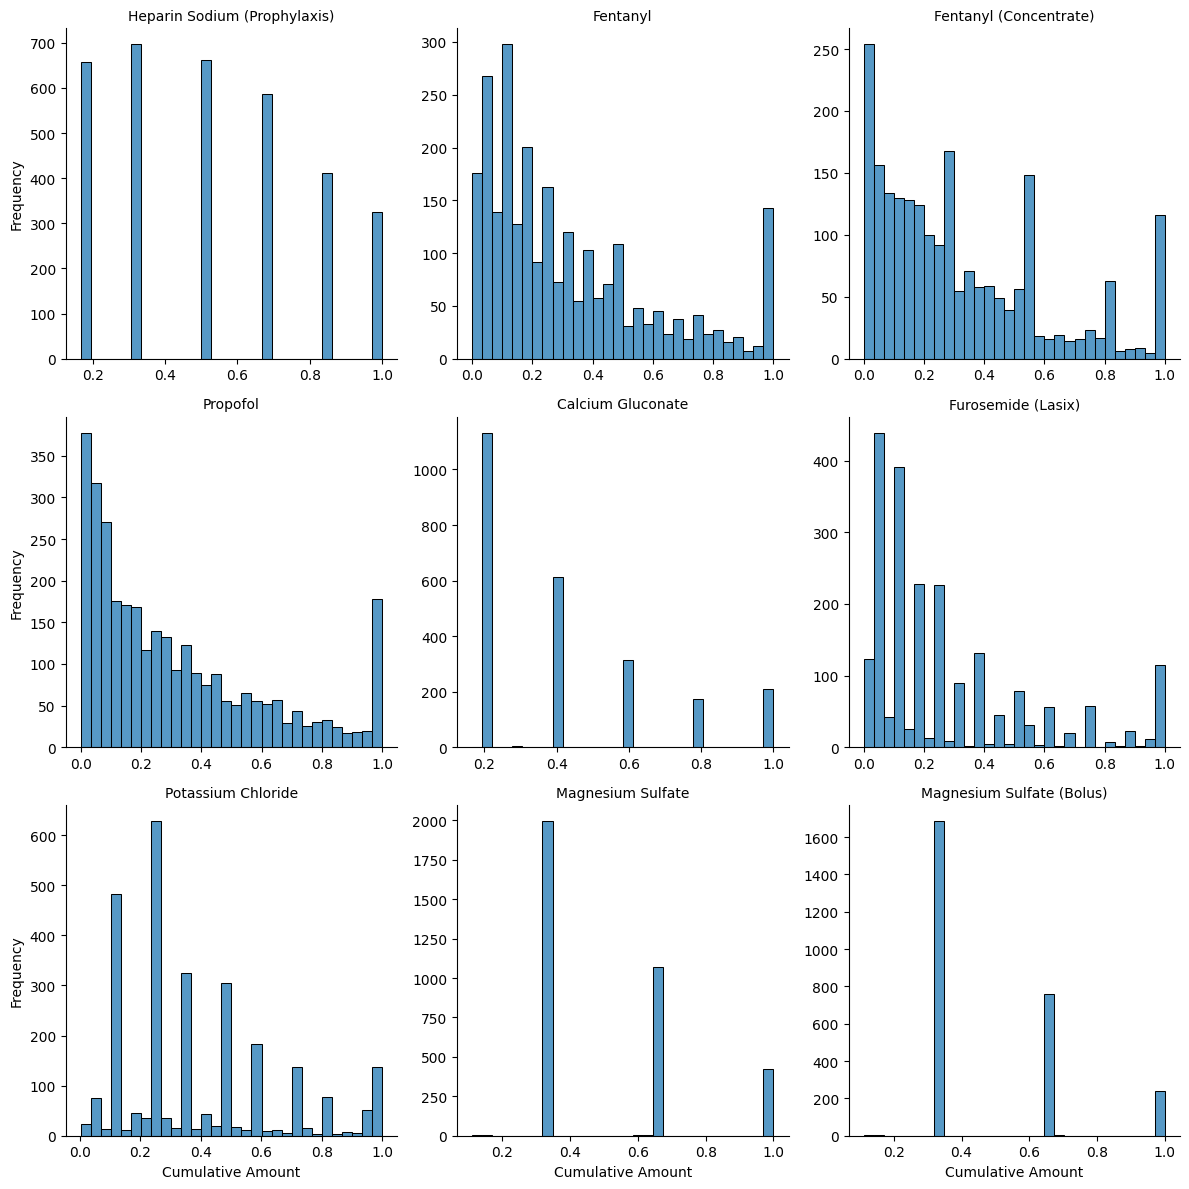

In [8]:
top_labels = df_max_cumulative['label'].value_counts().nlargest(9).index
df_subset = df_max_cumulative[df_max_cumulative['label'].isin(top_labels)]
g = sns.FacetGrid(df_subset, col="label", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "cumulative_amount_clipped_and_normalized", bins=30, kde=False)
g.set_titles("{col_name}")
g.set_axis_labels("Cumulative Amount", "Frequency")
plt.tight_layout()

In [9]:
# stay_ids = pd.read_csv('data/meta.csv').stay_id
# stay_ids

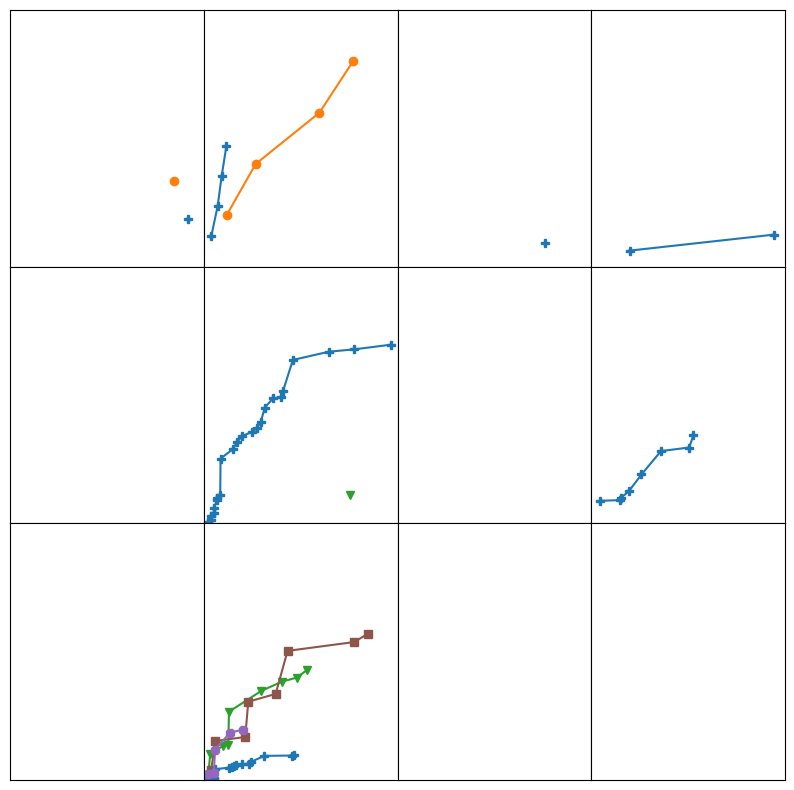

In [ ]:
cp = sns.color_palette()
markers = ['P','o','v','x','8','s','X','H','p','D']
stay_ids = all_subjects.stay_id
for stay_id in tqdm(stay_ids): # filtered_stay_ids
    split = all_subjects[all_subjects.stay_id==stay_id].split.iloc[0]
    if Path(f'data/meds2/{split}/{stay_id}.png').exists():
        continue
# stay_id = 31582758
# fig,axs = plt.subplots(5,5,figsize=(10,10))
    fig,axs = plt.subplots(3,4,figsize=(10,10))
    axs = axs.flatten()
    patient_meds = df_sorted[df_sorted.stay_id==stay_id]
    for label in patient_meds.label.unique():
        meds = patient_meds[patient_meds.label==label]
        x = meds.time_since_intime
        y = meds.cumulative_amount_clipped_and_normalized
        # parent_category = med_category_assignment[label]
        if label not in med_categories_t:
            continue
        parent_category = med_categories_t[label]
        ax = axs[np.argwhere(np.array(list(med_categories.keys())) == parent_category)[0,0]]
        # i = np.argwhere(np.array(med_category_assignment_t[parent_category])==label)[0,0]
        i = np.argwhere(np.array(med_categories[parent_category])==label)[0,0]
        ax.plot(x,y,color=cp[i],marker=markers[i])
        ax.set_ylim([0,1])
        ax.set_xlim([0,48])
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
    fig.subplots_adjust(hspace=0., wspace=0.)
    fig.savefig(f'data/meds2/{split}/{stay_id}.png', bbox_inches='tight', dpi=72)
    plt.close(fig)
    # break

In [13]:
# fig.savefig('images/med31582758.pdf',bbox_inches='tight')

In [29]:
np.array(list(med_categories.keys())) == parent_category

array([False, False, False, False, False, False, False,  True, False,
       False])

In [24]:
np.array(med_categories.keys())

array(dict_keys(['Antiarrhythmics', 'Electrolyte Supplements', 'Beta-Blockers', 'Diuretics', 'Cardiac Glycosides', 'Insulins', 'Opioid Analgesics', 'Sedatives and Anesthetics', 'Thrombolytics', 'Vasopressors and Inotropes']),
      dtype=object)

In [37]:
patientweight = df_sorted[['stay_id','patientweight','time_since_intime']].sort_values(by=['stay_id', 'time_since_intime'], ascending=True)#.std().value_counts()
patientweight.set_index('stay_id').to_csv('data/patientweight.csv')
patientweight

,stay_id,patientweight,time_since_intime
1,30004018,71.3,2.800000
2,30004018,71.3,13.200000
4,30004018,71.3,13.833333
5,30004018,71.3,15.966667
3,30004018,71.3,26.516667
...,...,...,...
268031,39997955,94.7,31.432778
268022,39997955,94.7,33.949444
268032,39997955,94.7,38.999444
268023,39997955,94.7,44.032778


In [38]:
df_avg_dosis = df_sorted.groupby(['stay_id', 'label']).agg({
    'cumulative_amount': 'max',
    'time_since_intime': ['min', 'max'],
    'amount': 'count'
}).reset_index()
df_avg_dosis.columns = ['stay_id', 'label', 'max_cumulative_amount', 'min_time_since_intime', 'max_time_since_intime','prescription_count']
df_avg_dosis['delta_time'] = df_avg_dosis['max_time_since_intime'] - df_avg_dosis['min_time_since_intime']
df_avg_dosis['delta_time'] = df_avg_dosis['delta_time'].replace(0, np.nan)
df_avg_dosis['average_dosis'] = df_avg_dosis['max_cumulative_amount'] / df_avg_dosis['delta_time']
df_avg_dosis['average_dosis'] = df_avg_dosis['average_dosis'].fillna(df_avg_dosis['max_cumulative_amount'])
df_avg_dosis.set_index('stay_id').to_csv('data/medication_doses.csv')
df_avg_dosis

,stay_id,label,max_cumulative_amount,min_time_since_intime,max_time_since_intime,prescription_count,delta_time,average_dosis
0,30004018,Diltiazem,10.000001,27.966667,27.966667,1,NaN,10.000001
1,30004018,Heparin Sodium (Prophylaxis),3.000000,2.800000,26.516667,3,23.716667,0.126493
2,30004018,Lorazepam (Ativan),3.500000,13.833333,45.566667,5,31.733333,0.110294
3,30004018,Metoprolol,10.000001,28.466667,28.633333,2,0.166667,60.000004
4,30004018,Morphine Sulfate,3.000000,34.966667,39.083333,2,4.116667,0.728745
...,...,...,...,...,...,...,...,...
57485,39997955,Acetaminophen-IV,2000.000000,33.949444,44.032778,2,10.083333,198.347107
57486,39997955,Heparin Sodium,59135.002693,1.449444,47.582778,6,46.133333,1281.828093
57487,39997955,Morphine Sulfate,2.000000,25.416111,31.432778,2,6.016667,0.332410
57488,39997955,Na Phos,15.000001,38.999444,38.999444,1,NaN,15.000001


In [33]:
df = meds_within_48h.reset_index()
# sort per stay_id (patient) and medication (label) by time_sine_intime
df_sorted = df.sort_values(by=['stay_id', 'label', 'time_since_intime'], ascending=True)
df_sorted.dropna(subset=['rate']).iloc[0]

stay_id                                          30004018
subject_id                                       11101925
hadm_id                                          23920532
caregiver_id                                        66056
starttime                             2158-12-29 03:20:00
endtime                               2158-12-29 04:15:00
storetime                             2158-12-29 04:12:00
itemid                                             221906
amount                                           0.117647
amountuom                                              mg
rate                                             0.030001
rateuom                                        mcg/kg/min
orderid                                           1866448
linkorderid                                       1866448
ordercategoryname                                01-Drips
secondaryordercategoryname       02-Fluids (Crystalloids)
ordercomponenttypedescription        Main order parameter
ordercategoryd

In [35]:
df_sorted[(df_sorted.stay_id==30004018)&(df_sorted.label=='Norepinephrine')]

,stay_id,subject_id,hadm_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate,label,time_since_intime
29457,30004018,11101925,23920532,66056,2158-12-29 03:20:00,2158-12-29 04:15:00,2158-12-29 04:12:00,221906,0.117647,mg,...,71.3,250.0,ml,0,0,ChangeDose/Rate,8.000000,0.03,Norepinephrine,29.800000
29458,30004018,11101925,23920532,66056,2158-12-29 04:15:00,2158-12-29 05:10:00,2158-12-29 06:01:00,221906,0.235230,mg,...,71.3,250.0,ml,0,0,ChangeDose/Rate,7.882353,0.06,Norepinephrine,30.716667
29459,30004018,11101925,23920532,66056,2158-12-29 05:10:00,2158-12-29 08:36:00,2158-12-29 06:01:00,221906,1.174726,mg,...,71.3,250.0,ml,0,0,Stopped,7.647122,0.08,Norepinephrine,31.633333


In [36]:
df_sorted.statusdescription.unique()

array(['FinishedRunning', 'ChangeDose/Rate', 'Stopped', 'Paused', 'Bolus'],
      dtype=object)